### California Housing Prediction

In [43]:
# Import the necessary library packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

%matplotlib inline

In [44]:
# import the Dataset
try:
    # Provide the path to your CSV file
    file_path = "data\housing.csv"
    
    # Use the `read_csv` function to read the CSV file
    df = pd.read_csv(file_path)

    # You can now work with the 'data' DataFrame
    # print(data.head())  # This will display the first few rows of your data
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {str(e)}")


In [45]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


#### Checking the characterisitcs of the dataset

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [47]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [48]:
df.duplicated().sum()

0

In [49]:
df.dropna(inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


### Split the data into Training and Test Data

In [51]:
# Import scikit-learn
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis =1)
y = df['median_house_value']

In [52]:
# Split the dataframe into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Put all training data together
train_data = X_train.join(y_train)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

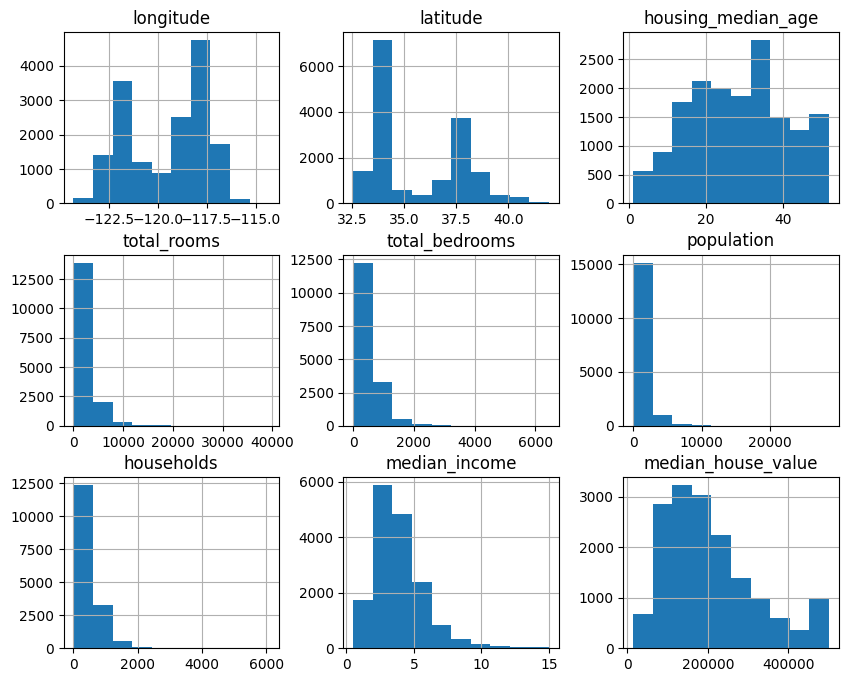

In [53]:
train_data.hist(figsize=(10,8))

<Axes: >

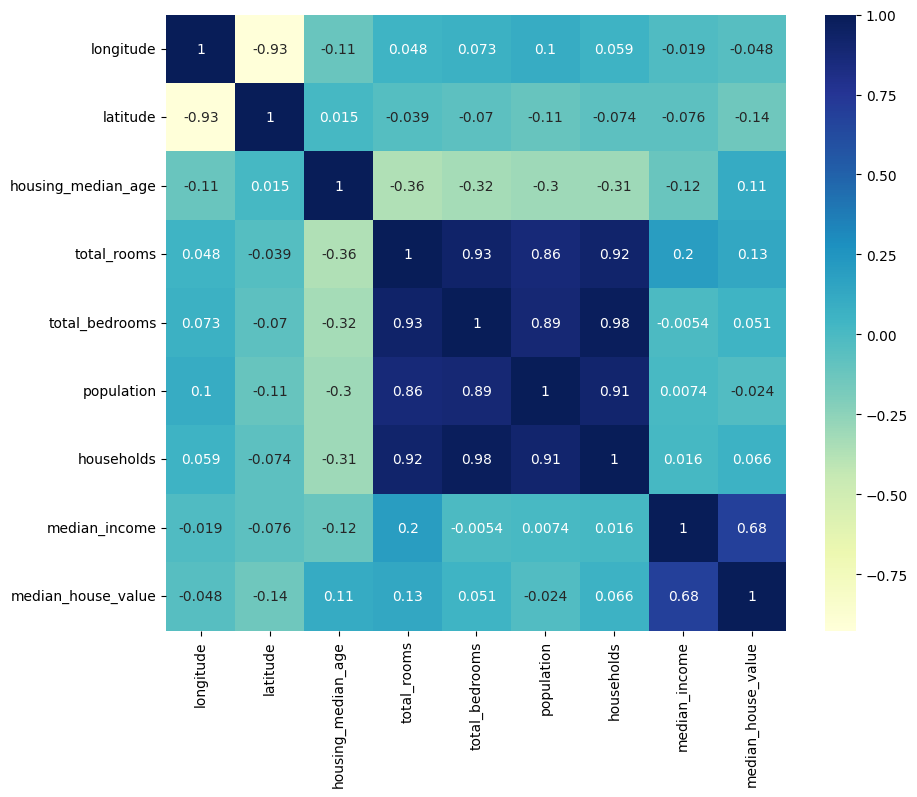

In [54]:
# Visualize a heatmap of the numeric columns
plt.figure(figsize = (10, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap = 'YlGnBu')

In [55]:
train_data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14243,-117.10,32.69,11,3071,911.0,2812,774,1.2413,NEAR OCEAN,83100
4116,-118.42,34.13,38,3830,518.0,1292,516,12.7823,<1H OCEAN,500001


In [56]:
# Create a logarithm of each of the key features and see their distribution
# 1 is added to prevent 0 values
train_data.total_rooms = np.log(train_data.total_rooms + 1)
train_data.total_bedrooms = np.log(train_data.total_bedrooms + 1)
train_data.population = np.log(train_data.population + 1)
train_data.households = np.log(train_data.households + 1)



array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

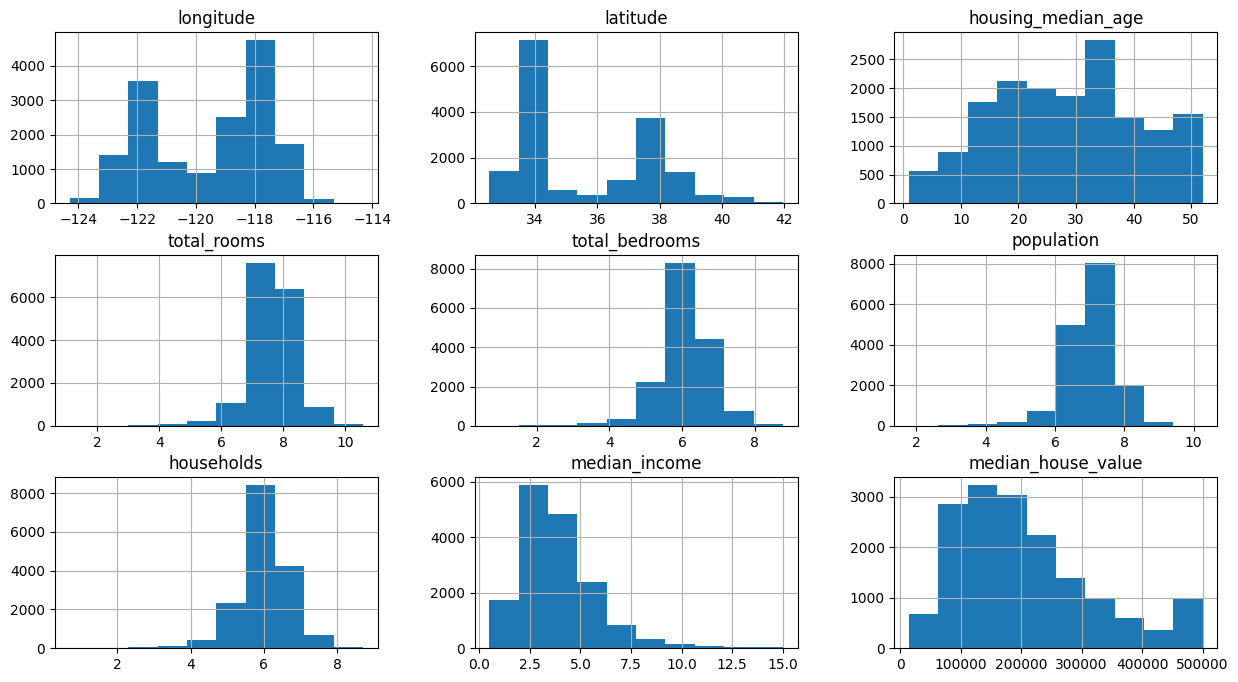

In [57]:
# plt.figure(figsize=(15,10))
train_data.hist(figsize = (15,8))


In [58]:
# Change the 'near ocean' to numeric

train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7235
INLAND        5163
NEAR OCEAN    2102
NEAR BAY      1841
ISLAND           5
Name: count, dtype: int64

In [59]:
# Create a binary options for the options - 
# pd.get_dummies(train_data.ocean_proximity).astype(int) to convert them from boolean to binary
# We can now drop the ocean proximity column - drop(['ocean_proximity'], axis=1)
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int)).drop(['ocean_proximity'], axis=1)


<Axes: >

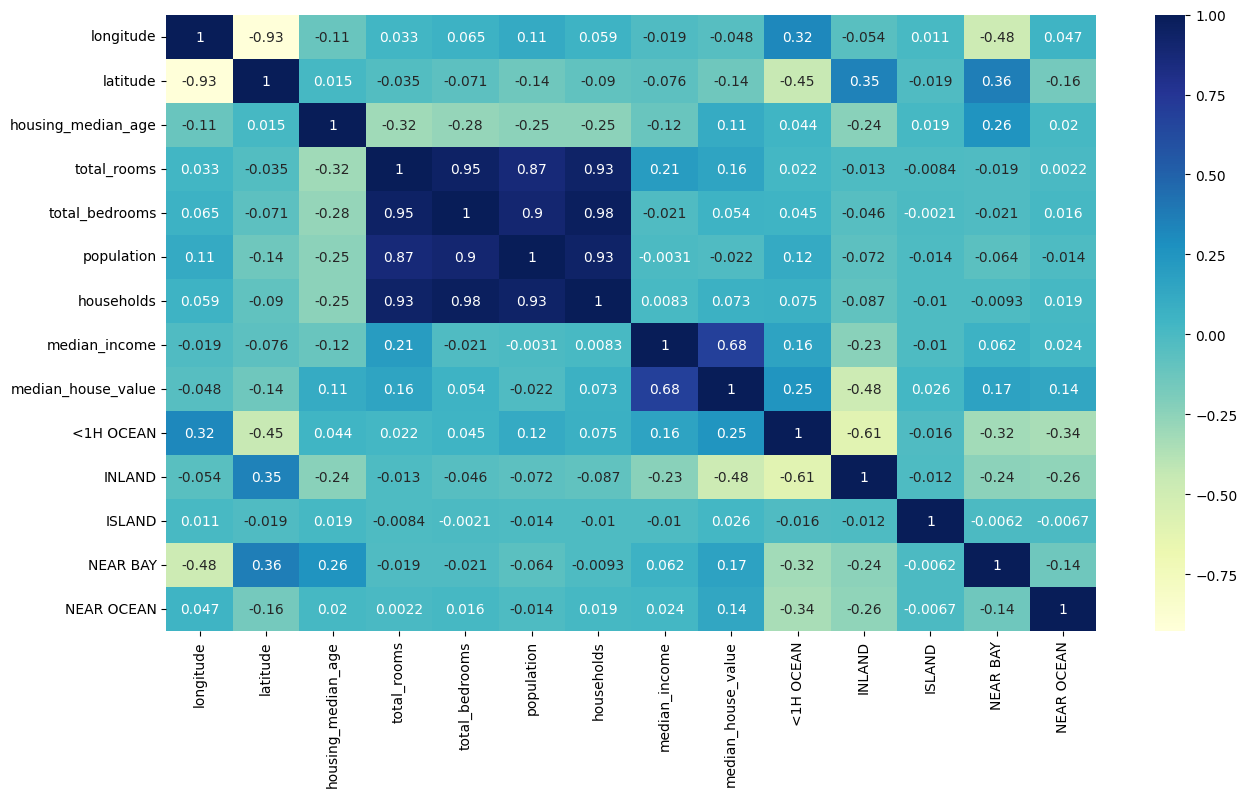

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap= 'YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

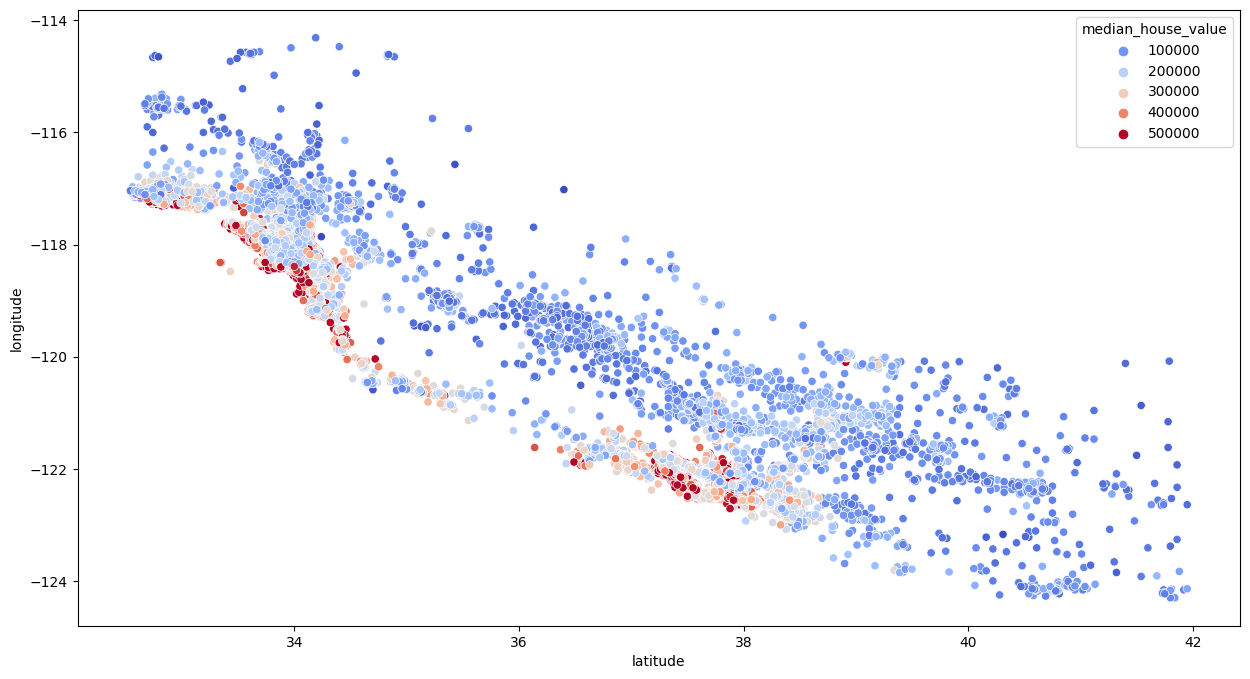

In [61]:
# Visualize the cordinates

plt.figure (figsize=(15,8))
sns.scatterplot(x ='latitude', y ='longitude', data = train_data, hue = "median_house_value", palette='coolwarm')

#### Feature Engineering

In [62]:
# add a bedroom ration
train_data['bedroom_ratio'] = train_data.total_bedrooms / train_data.total_rooms
train_data['household_rooms'] = train_data.total_rooms / train_data.households


<Axes: >

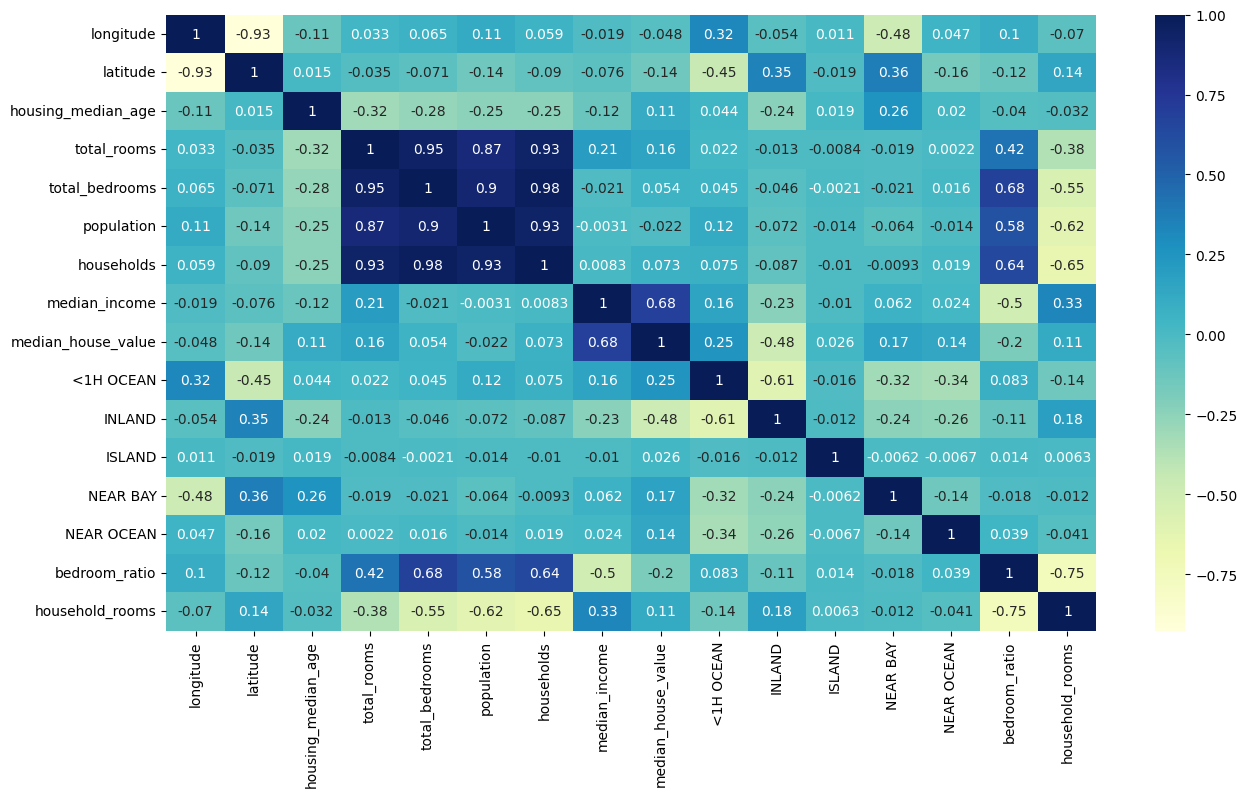

In [63]:
# Revisualize the heatmap to see how the new feature and their relationship with prices
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = 'YlGnBu')

### Linear Regression Model

In [64]:
# Simple linear regression model
from sklearn.linear_model import LinearRegression
# Split the data
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

# Call LinearRegression class
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [65]:
# Prepare test Data
test_data = X_test.join(y_test)

test_data.total_rooms = np.log(test_data['total_rooms']+1)
test_data.total_bedrooms = np.log(test_data['total_bedrooms']+1)
test_data.population = np.log(test_data['population']+1)
test_data.households = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data.total_bedrooms / test_data.total_rooms
test_data['household_rooms'] = test_data.total_rooms / test_data.households



In [66]:
test_data.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18134,-122.03,37.35,25,8.037866,6.244167,7.132498,6.230481,5.5388,352100,True,False,False,False,0.776844,1.290088
17069,-122.25,37.53,16,8.395929,6.499787,7.425358,6.436150,7.6864,422500,False,False,True,False,0.774159,1.304495
18903,-122.26,38.12,28,8.040125,6.599870,7.392648,6.461468,3.1025,103700,False,False,True,False,0.820867,1.244319
8771,-118.34,33.80,34,7.456455,6.059123,6.916715,5.976351,3.9408,327700,True,False,False,False,0.812601,1.247660


In [67]:
X_test, y_train = test_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

In [68]:
reg.score(X_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ISLAND


##### Linear Regression Model not too good nor too bad

## Random Forest Model

In [ ]:
# using random forest classifier

from sklearn.ensemble import RandomForestRegressor
forest  = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test, y_test)

0.8152706403191461

In [69]:
from sklearn.model_selection import GridSearchCV


forest = RandomForestRegressor()

param_grid = {
"n_estimators": [3,10,30],
"max_features": [2,4,6,8]

}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring ='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
best_forest = grid_search.best_estimator_
best_forest

RandomForestRegressor(max_features=8, n_estimators=30)

In [77]:
# grid_search.best_estimator_.score(X_test, y_test)